In [182]:
#Q1: Does the lilklihood of readmission depend on  race (specifically I was interested to compare the readmission of African Americans with people of other races). Comparison was done seprately for men and women
# Q2: Is there was a relationship between time in hospital
import pandas as pd
dfH = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
dfH.head(10)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [183]:
dfH.shape

(101766, 50)

In [184]:
# some general descriptives of the diabetes data
dfH.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [185]:
# filtered the data to the variables that intrested me and looke at the type of data types
dfH = dfH[['encounter_id', 'race','readmitted','gender','age','time_in_hospital']]


In [186]:
#cleaning
dfH['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [187]:

dfH['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [188]:

dfH = dfH.loc[dfH["race"] !=  "?" ]

In [189]:

dfH['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [190]:

dfH = dfH.loc[dfH["gender"] !=  "Unknown/Invalid" ]

In [191]:

dfH['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [192]:
# decided to collapse into two categories (readmitted within 30 days and not readmitted within 30) I changed  0, 1  so I could easily get descriptives graphs that included the proption redmitted within 30 days
dfP = dfH.replace('NO', '0')
dfM = dfP.replace('>30','0')
dfN = dfM.replace('<30','1')
dfN.head()

,encounter_id,race,readmitted,gender,age,time_in_hospital
0,2278392,Caucasian,0,Female,[0-10),1
1,149190,Caucasian,0,Female,[10-20),3
2,64410,AfricanAmerican,0,Female,[20-30),2
3,500364,Caucasian,0,Male,[30-40),2
4,16680,Caucasian,0,Male,[40-50),1


In [193]:
# checking and fixing data ttpes
dfN.dtypes

encounter_id         int64
race                object
readmitted          object
gender              object
age                 object
time_in_hospital     int64
dtype: object

In [194]:

dfN['readmitted']= dfN['readmitted'].apply(float)
dfN['time_in_hospital'].apply(float)



0          1.0
1          3.0
2          2.0
3          2.0
4          1.0
          ... 
101761     3.0
101762     5.0
101763     1.0
101764    10.0
101765     6.0
Name: time_in_hospital, Length: 99492, dtype: float64

[Text(0, 0, '0.114893'),
 Text(0, 0, '0.110846'),
 Text(0, 0, '0.102941'),
 Text(0, 0, '0.0754717'),
 Text(0, 0, '0.0915751')]

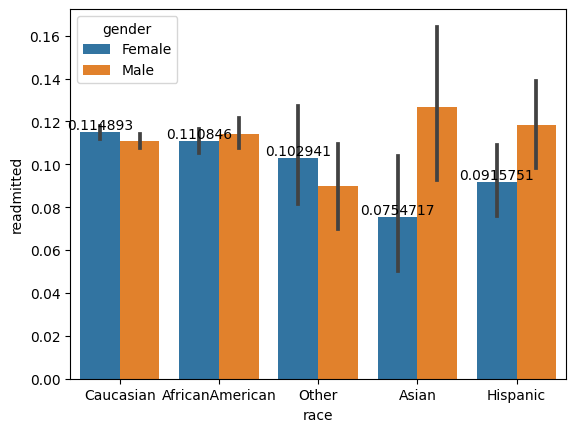

In [195]:
#Visualization Q1
import seaborn as sns

ax = sns.barplot(x = 'race', y = 'readmitted',data = dfN, hue = 'gender')
ax.bar_label(ax.containers[0])

In [196]:
# Q2 - looked at readmissioan rate by number of days in the hospital
dfr = dfN.groupby(['time_in_hospital'], as_index = False).agg ({'readmitted': 'mean'})
print(dfr)

    time_in_hospital  readmitted
0                  1    0.082294
1                  2    0.100053
2                  3    0.107658
3                  4    0.118045
4                  5    0.121274
5                  6    0.126392
6                  7    0.128497
7                  8    0.143356
8                  9    0.138095
9                 10    0.145351
10                11    0.105727
11                12    0.135249
12                13    0.123633
13                14    0.129666


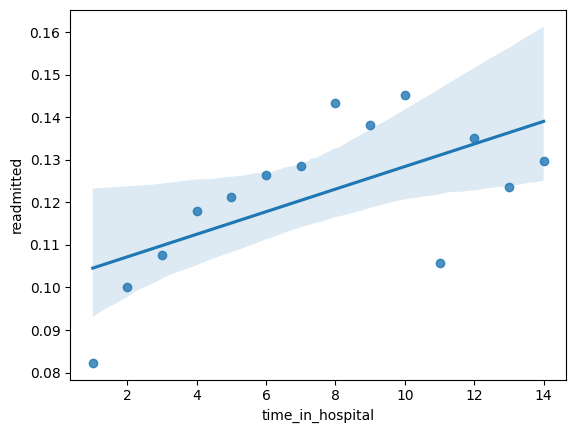

In [197]:
#visualization Q2
sns.regplot(x="time_in_hospital", y="readmitted", data=dfr);

In [198]:
#  wanted to see if the correlation was significant
from scipy.stats import pearsonr
pearsonr(dfr['time_in_hospital'], dfr['readmitted'])


PearsonRResult(statistic=0.6249733990359696, pvalue=0.01685824598242006)

The conclusion from this analysis. There appeared to be no significant difference between people in different racial groups in the rate of readmission. There is significant relationship between time in the hospital and readmission. With nmore days in the hospital increasing the readmission rate